In [ ]:
import pandas as pd
DF_RFM = pd.read_csv('RFM_data.csv', encoding = 'utf-8')

In [ ]:
DF_RFM

,CustomerID,recency,frequency,monetary_value
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,756,2094.88


In [ ]:
import pandas as pd
DF_RFM = pd.read_csv('RFM_data.csv', encoding = 'utf-8')
DF_RFM['recency_normalized']=pd.qcut(DF_RFM['recency'],50,labels=False)
DF_RFM['recency_normalized']=DF_RFM['recency_normalized']+1
DF_RFM['frequency_normalized']=pd.qcut(DF_RFM['frequency'],50,labels=False)
DF_RFM['frequency_normalized']=DF_RFM['frequency_normalized']+1
DF_RFM['monetary_value_normalized']=pd.qcut(DF_RFM['monetary_value'],50,labels=False)
DF_RFM['monetary_value_normalized']=DF_RFM['monetary_value_normalized']+1

In [ ]:
DF_RFM

,CustomerID,recency,frequency,monetary_value,recency_normalized,frequency_normalized,monetary_value_normalized
0,12346.0,325,1,77183.60,49,1,50
1,12347.0,2,182,4310.00,2,45,47
2,12348.0,75,31,1797.24,31,21,39
3,12349.0,18,73,1757.55,13,34,39
4,12350.0,310,17,334.40,48,13,15
...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,46,7,7
4335,18281.0,180,7,80.82,41,5,2
4336,18282.0,7,12,178.05,6,9,7
4337,18283.0,3,756,2094.88,3,50,41


In [ ]:
import numpy as np
from sklearn import preprocessing

DF_ARRAY = np.array(DF_RFM.iloc[:,4:8])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

In [ ]:
DF_ARRAY

array([[49,  1, 50],
       [ 2, 45, 47],
       [31, 21, 39],
       ...,
       [ 6,  9,  7],
       [ 3, 50, 41],
       [23, 33, 39]])

In [ ]:
DF_NORM

array([[0.69985719, 0.0142828 , 0.71413999],
       [0.030722  , 0.69124506, 0.72196706],
       [0.57338627, 0.38842295, 0.72135692],
       ...,
       [0.46569032, 0.69853547, 0.54330537],
       [0.04634621, 0.77243687, 0.63339823],
       [0.41051798, 0.58900405, 0.6960957 ]])

In [ ]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 10)

# Training our model
kmeans.fit(DF_NORM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

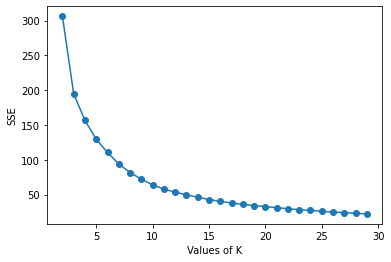

In [ ]:
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 30)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [ ]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 15)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
DF_RFM['cluster'] = kmeans.labels_

In [ ]:
DF_RFM

,CustomerID,recency,frequency,monetary_value,recency_normalized,frequency_normalized,monetary_value_normalized,cluster
0,12346.0,325,1,77183.60,49,1,50,6
1,12347.0,2,182,4310.00,2,45,47,1
2,12348.0,75,31,1797.24,31,21,39,6
3,12349.0,18,73,1757.55,13,34,39,14
4,12350.0,310,17,334.40,48,13,15,11
...,...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,46,7,7,0
4335,18281.0,180,7,80.82,41,5,2,0
4336,18282.0,7,12,178.05,6,9,7,3
4337,18283.0,3,756,2094.88,3,50,41,1


In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()
    
PLOT.add_trace(go.Scatter3d(x = DF_RFM['recency_normalized'],
                            y = DF_RFM['frequency_normalized'],
                            z = DF_RFM['monetary_value_normalized']
                           )
              )

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(DF_RFM.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = DF_RFM[DF_RFM.cluster == C]['recency_normalized'],
                                y = DF_RFM[DF_RFM.cluster == C]['frequency_normalized'],
                                z = DF_RFM[DF_RFM.cluster == C]['monetary_value_normalized'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'RFM Segment ' + str(C)))

In [ ]:
PLOT.update_layout(width = 1000, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary Value', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [ ]:
DF_RFM[DF_RFM.cluster==6]

,CustomerID,recency,frequency,monetary_value,recency_normalized,frequency_normalized,monetary_value_normalized,cluster
19,12367.0,4,11,168.90,4,8,6,6
36,12391.0,21,100,460.89,15,38,20,6
78,12442.0,3,12,172.06,3,9,6,6
128,12508.0,26,69,398.27,18,33,18,6
166,12556.0,50,121,603.71,25,40,24,6
...,...,...,...,...,...,...,...,...
4220,18125.0,29,196,1142.99,19,45,33,6
4222,18127.0,19,47,348.73,14,27,15,6
4241,18156.0,12,140,734.94,10,42,27,6
4261,18181.0,24,44,382.80,17,26,17,6


In [ ]:
cluster_energy=DF_RFM.groupby(by='cluster').sum('recency')

In [ ]:
cluster_energy['strength']=cluster_energy['frequency_normalized']+cluster_energy['monetary_value_normalized']-cluster_energy['recency_normalized']

In [ ]:
cluster_energy

,CustomerID,recency,frequency,monetary_value,recency_normalized,frequency_normalized,monetary_value_normalized,strength
cluster,,,,,,,,
0,5057800.0,55033,6785,133154.941,12470,4844,5578,-2048
1,6895930.0,9114,72105,1586028.390,6356,17304,17660,28608
2,6393053.0,17943,42202,828311.591,9389,14385,15083,20079
3,5554900.0,77608,2071,41645.070,14740,1452,1293,-11995
4,2159748.0,19171,1019,284389.650,4866,724,3784,-358
5,6587457.0,35795,27739,470198.451,12617,12359,12571,12313
6,2491419.0,1419,24700,131722.170,1151,6214,4161,9224
7,8680756.0,2810,163981,4313481.030,2525,23352,24098,44925
8,5026098.0,40918,11498,208933.591,11265,7139,7621,3495


In [ ]:
cluster_energy.sort_values(['strength'], ascending=[False], inplace=True)

In [ ]:
cluster_energy.sort_values('strength',ascending=False,inplace=True)

In [ ]:
cluster_energy

,CustomerID,recency,frequency,monetary_value,recency_normalized,frequency_normalized,monetary_value_normalized,strength
cluster,,,,,,,,
7,8680756.0,2810,163981,4313481.030,2525,23352,24098,44925
1,6895930.0,9114,72105,1586028.390,6356,17304,17660,28608
2,6393053.0,17943,42202,828311.591,9389,14385,15083,20079
5,6587457.0,35795,27739,470198.451,12617,12359,12571,12313
6,2491419.0,1419,24700,131722.170,1151,6214,4161,9224
11,2796395.0,5049,18100,95026.360,3117,6245,3550,6678
8,5026098.0,40918,11498,208933.591,11265,7139,7621,3495
12,2020569.0,9824,3714,248930.360,3765,2442,4605,3282
14,1346088.0,1144,1545,381340.210,830,1066,3042,3278
